# Data Analysis

Author: Branden Addicot <br>
Created on: 16 August 2020

In [2]:
#import Pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
#Read the reduced csv file for SC
df = pd.read_csv('/home/branden/Projects/IBMCapstone/CSV/SC_Accident.csv', header=None, names=['Severity', 'Start_date', 'start_year', 'Start_Month', 'Start_day',  'Start_hour', 'Temperature', 'Visibility', 'Wind_Speed', 'Precipitation'])

In [4]:
df.head()

,Severity,Start_date,start_year,Start_Month,Start_day,Start_hour,Temperature,Visibility,Wind_Speed,Precipitation
0,2,20161130,2016,11,4,16,64.9,0.8,17.3,0.47
1,2,20161130,2016,11,4,17,63.0,4.0,10.4,0.36
2,3,20161130,2016,11,4,18,62.6,10.0,8.1,0.16
3,2,20161130,2016,11,4,19,64.0,10.0,9.2,0.00
4,2,20161130,2016,11,4,19,68.0,2.0,10.4,0.24


## Create a crosstabs of Severity by Day of Week

In [5]:
df1=df[['Severity','Start_day']]
pd.crosstab(df1.Start_day.astype('category'),df1.Start_day.astype('category'))

Start_day,1,2,3,4,5,6,7
Start_day,,,,,,,
1,5243,0,0,0,0,0,0
2,0,31722,0,0,0,0,0
3,0,0,32239,0,0,0,0
4,0,0,0,31587,0,0,0
5,0,0,0,0,31792,0,0
6,0,0,0,0,0,34778,0
7,0,0,0,0,0,0,5916


In [6]:
pd.crosstab(df1.Severity.astype('category'),df1.Severity.astype('category'))

Severity,1,2,3,4
Severity,,,,
1,116,0,0,0
2,0,137371,0,0
3,0,0,34620,0
4,0,0,0,1170


In [7]:
pd.crosstab(df1.Start_day.astype('category'),df1.Severity.astype('category'))

Severity,1,2,3,4
Start_day,,,,
1,4,3127,2020,92
2,18,25729,5790,185
3,22,26211,5782,224
4,24,25605,5801,157
5,28,25794,5758,212
6,19,27040,7542,177
7,1,3865,1927,123


Crosstabs above show that the majority of accidents accure durint the workweek and that two and three are the most common Severity of an accident. The most frequently occuring accident is a severity 2 on a Friday.

## Crosstabs of Severity and Month

In [8]:
df1=df[['Severity','Start_Month','start_year']]
pd.crosstab(df1.Start_Month.astype('category'),df1.Start_Month.astype('category'))

Start_Month,1,2,3,4,5,6,7,8,9,10,11,12
Start_Month,,,,,,,,,,,,
1,15081,0,0,0,0,0,0,0,0,0,0,0
2,0,13852,0,0,0,0,0,0,0,0,0,0
3,0,0,14331,0,0,0,0,0,0,0,0,0
4,0,0,0,15130,0,0,0,0,0,0,0,0
5,0,0,0,0,15155,0,0,0,0,0,0,0
6,0,0,0,0,0,13680,0,0,0,0,0,0
7,0,0,0,0,0,0,9941,0,0,0,0,0
8,0,0,0,0,0,0,0,14774,0,0,0,0
9,0,0,0,0,0,0,0,0,13854,0,0,0


In [9]:
df1=df[['Severity','Start_Month','start_year']]
pd.crosstab(df1.Start_Month.astype('category'),df1.Severity.astype('category'))

Severity,1,2,3,4
Start_Month,,,,
1,5,12133,2797,146
2,3,11282,2456,111
3,10,11570,2675,76
4,29,12216,2787,98
5,15,12393,2665,82
6,29,10909,2631,111
7,5,7687,2170,79
8,5,11450,3230,89
9,5,10560,3199,90


In [121]:
df1=df['Start_hour'].value_counts()
df1
#df1.plot.box()

17    7956
16    7690
7     6217
18    6179
8     6014
15    5523
11    4725
10    4461
6     4021
13    3820
14    3716
19    3694
12    3482
9     3192
4     2598
5     2130
20     937
21     712
22     559
23      78
0       62
1       27
2       22
3       19
Name: Start_hour, dtype: int64

Accidents appear to be equaly distributed accross the 12 months in both volumn and severity

In [10]:
df1=df[['Severity','Start_hour']]
pd.crosstab(df1.Start_hour.astype('category'),df1.Severity.astype('category'))

Severity,1,2,3,4
Start_hour,,,,
0,0,105,36,41
1,0,61,22,19
2,0,56,19,16
3,0,48,26,23
4,0,3715,861,46
5,4,4066,807,35
6,10,7615,1889,44
7,9,11603,2919,44
8,33,10748,2871,43


Accidents appear to be bi-modal around the work traval times.

## Scatter plot of Serverity vs Precipitation

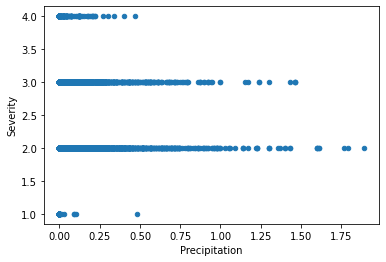

In [11]:
df1=df[['Severity','Precipitation']]
df1.plot.scatter(x='Precipitation', y='Severity');

It is interesting to know that the majoirty of severity 4 accidents happen when precipitation is below 0.25 inches.

## Scater plot of Serverity vs Visability

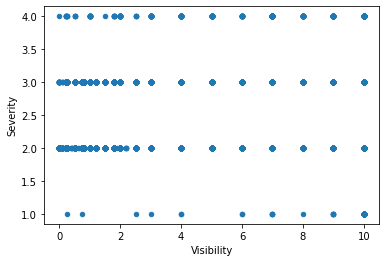

In [12]:
df1=df[['Severity','Visibility']]
df1.plot.scatter(x='Visibility', y='Severity');

## Scater plot of Serverity vs Temp

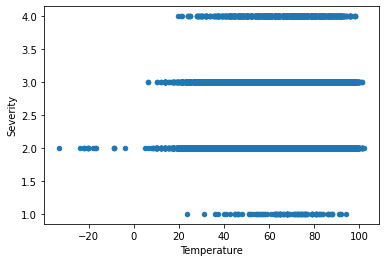

In [13]:
df1=df[['Severity','Temperature']]
df1.plot.scatter(x='Temperature', y='Severity');

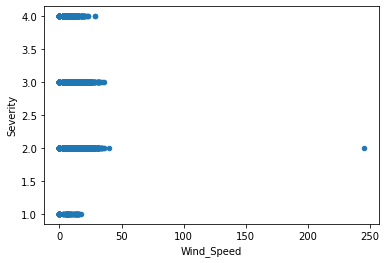

In [14]:
df1=df[['Severity','Wind_Speed']]
df1.plot.scatter(x='Wind_Speed', y='Severity');


In [15]:
df1=df
df1.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
X_parameters=df1[['start_year', 'Start_Month', 'Start_day',  'Start_hour', 'Temperature', 'Visibility', 'Wind_Speed', 'Precipitation']]
X_parameters= preprocessing.StandardScaler().fit(X_parameters).transform(X_parameters)
Y_parameters=df1['Severity']

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X_parameters, Y_parameters)
predictions = {}
predictions['intercept'] = regr.intercept_
predictions['coefficient'] = regr.coef_

In [17]:
print('Intercept',predictions['intercept'])
print('coefficient',predictions['coefficient'])

Intercept 2.1840712285119595
coefficient [-0.04674621 -0.01440273  0.00605405 -0.01238006  0.01285498 -0.0145873
  0.00351279  0.0130213 ]


# Decision Tree

In [18]:
from sklearn.model_selection import train_test_split

In [63]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_parameters, Y_parameters, test_size=0.3, random_state=3)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn

In [65]:
from sklearn import metrics
depth=list();
Accuracy=list();

for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    tree.fit(X_trainset,y_trainset)
    yhat=tree.predict(X_testset)
    Accuracy.append(metrics.accuracy_score(y_testset, yhat))
    
print( "The best accuracy was with", np.array(Accuracy).max(), "with Max Depth=", np.array(Accuracy).argmax()+1) 



The best accuracy was with 0.8183375444306453 with Max Depth= 9


In [78]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)

In [79]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [80]:
predTree = drugTree.predict(X_parameters)

In [81]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_parameters, predTree))

DecisionTrees's Accuracy:  0.8275689287457924
